# Handwritten Digits Detection
---
Marco Sanguineti, November 2021

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)

2.6.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
try:
  !nvidia-smi
except Exception as e:
  print(e)

Sat Nov  6 09:29:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    73W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train[0].shape

(28, 28)

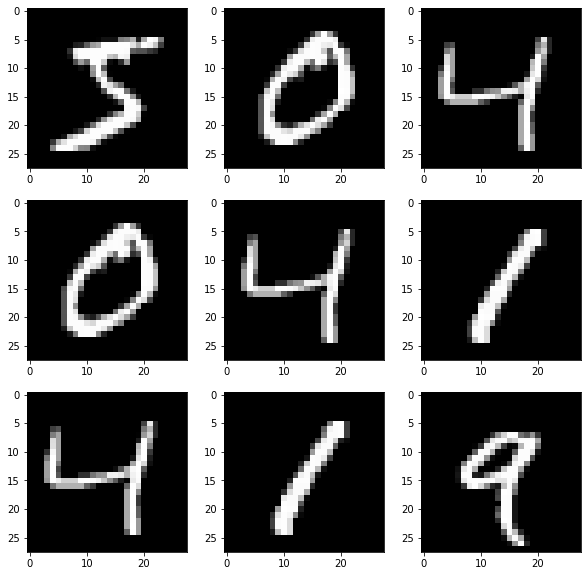

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
  for j in range(3):
    ax[i, j].imshow(x_train[i + j], cmap="gray")

plt.show()

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [10]:
images = tf.keras.layers.Input(shape=x_train[0].shape)
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))(images)
x = tf.keras.layers.Conv2D(16, (3, 3))(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(32, (3, 3))(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)(x)

model = tf.keras.models.Model(images, x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0     

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
import time

start_time = time.time()

history = model.fit(x=x_train,
                    y=y_train,
                    epochs=5,
                    batch_size=256)

print("\n--- %s seconds ---" % (time.time() - start_time))

Epoch 1/5
235/235 [==============================] - 4s 9ms/step - loss: 0.5968 - accuracy: 0.8442
Epoch 2/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1827 - accuracy: 0.9460
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1223 - accuracy: 0.9644
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 0.0983 - accuracy: 0.9707
Epoch 5/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0853 - accuracy: 0.9747
--- 11.172645807266235 seconds ---


In [13]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)

print(f'\nTest accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9756

Test accuracy: 0.975600004196167


In [14]:
predictions = model.predict([x_test])

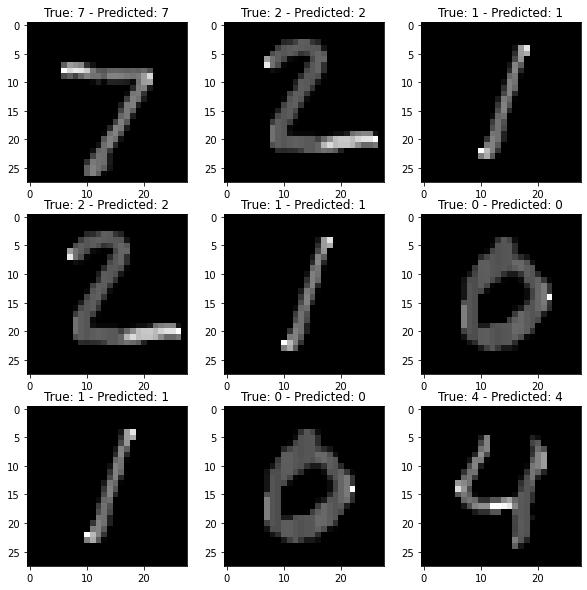

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
  for j in range(3):
    ax[i, j].imshow(x_test[i + j], cmap="gray")
    ax[i, j].set_title(f'True: {y_test[i + j]} - Predicted: {np.argmax(predictions[i + j])}')

plt.show()

In [16]:
try:
  !nvidia-smi
except Exception as e:
  print(e)

Sat Nov  6 09:29:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    82W / 149W |    769MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------